# 충남과학고등학교 데이터분석 특강 (3H / 6H)
# 예제로 배우는 데이터 분석
## 초급: 3H, 중급: 6H (초중급 3H 동일)

# Case 4: 코로나 바이러스 기초 분석
##### [데이터출처1](https://github.com/CSSEGISandData/COVID-19)
##### [데이터출처2](https://www.kaggle.com/datasets/antgoldbloom/covid19-data-from-john-hopkins-university)

### Step1. 데이터 준비

#### 도구 불러오기

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib widget

#### 데이터 경로 설정 (data_root)

In [10]:
data_root = 'datasets/covid-19/CONVENIENT_global_confirmed_cases.csv'
data_root

'datasets/covid-19/CONVENIENT_global_confirmed_cases.csv'

#### 데이터 읽어오기

In [17]:
df = pd.read_csv(data_root)
df

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,7/5/22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4622.0,74.0,58.0,0.0,989.0,0.0,0.0,0.0,0.0,29.0
896,7/6/22,186.0,1121.0,8.0,494.0,0.0,0.0,3.0,0.0,0.0,...,0.0,87.0,23.0,167.0,914.0,0.0,0.0,0.0,149.0,50.0
897,7/7/22,105.0,947.0,21.0,0.0,0.0,0.0,13.0,0.0,0.0,...,0.0,94.0,99.0,106.0,913.0,0.0,0.0,0.0,243.0,0.0
898,7/8/22,137.0,973.0,26.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,91.0,0.0,442.0,802.0,0.0,0.0,0.0,143.0,86.0


##### 누락 데이터 (Missing value, NaN) 처리

In [18]:
df.fillna(0, inplace=True)
df

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,7/5/22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4622.0,74.0,58.0,0.0,989.0,0.0,0.0,0.0,0.0,29.0
896,7/6/22,186.0,1121.0,8.0,494.0,0.0,0.0,3.0,0.0,0.0,...,0.0,87.0,23.0,167.0,914.0,0.0,0.0,0.0,149.0,50.0
897,7/7/22,105.0,947.0,21.0,0.0,0.0,0.0,13.0,0.0,0.0,...,0.0,94.0,99.0,106.0,913.0,0.0,0.0,0.0,243.0,0.0
898,7/8/22,137.0,973.0,26.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,91.0,0.0,442.0,802.0,0.0,0.0,0.0,143.0,86.0


##### 첫 행 (1st row) 제거
###### Province/State 는 데이터 설명용 meta data

In [19]:
df.drop(index=0, inplace=True)
df

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,7/5/22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4622.0,74.0,58.0,0.0,989.0,0.0,0.0,0.0,0.0,29.0
896,7/6/22,186.0,1121.0,8.0,494.0,0.0,0.0,3.0,0.0,0.0,...,0.0,87.0,23.0,167.0,914.0,0.0,0.0,0.0,149.0,50.0
897,7/7/22,105.0,947.0,21.0,0.0,0.0,0.0,13.0,0.0,0.0,...,0.0,94.0,99.0,106.0,913.0,0.0,0.0,0.0,243.0,0.0
898,7/8/22,137.0,973.0,26.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,91.0,0.0,442.0,802.0,0.0,0.0,0.0,143.0,86.0


##### 열 번호 재배치

In [20]:
df.reset_index(drop=True, inplace=True)
df

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,7/5/22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4622.0,74.0,58.0,0.0,989.0,0.0,0.0,0.0,0.0,29.0
895,7/6/22,186.0,1121.0,8.0,494.0,0.0,0.0,3.0,0.0,0.0,...,0.0,87.0,23.0,167.0,914.0,0.0,0.0,0.0,149.0,50.0
896,7/7/22,105.0,947.0,21.0,0.0,0.0,0.0,13.0,0.0,0.0,...,0.0,94.0,99.0,106.0,913.0,0.0,0.0,0.0,243.0,0.0
897,7/8/22,137.0,973.0,26.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,91.0,0.0,442.0,802.0,0.0,0.0,0.0,143.0,86.0


### Step 2. 기초 분석

#### 나라 리스트

In [25]:
counter = 0
for country in df.columns:
    counter = counter + 1
    if counter%5 == 0:
        print(country)
    else:
        print(country, end='  ')
print()

Country/Region  Afghanistan  Albania  Algeria  Andorra
Angola  Antarctica  Antigua and Barbuda  Argentina  Armenia
Australia  Australia.1  Australia.2  Australia.3  Australia.4
Australia.5  Australia.6  Australia.7  Austria  Azerbaijan
Bahamas  Bahrain  Bangladesh  Barbados  Belarus
Belgium  Belize  Benin  Bhutan  Bolivia
Bosnia and Herzegovina  Botswana  Brazil  Brunei  Bulgaria
Burkina Faso  Burma  Burundi  Cabo Verde  Cambodia
Cameroon  Canada  Canada.1  Canada.2  Canada.3
Canada.4  Canada.5  Canada.6  Canada.7  Canada.8
Canada.9  Canada.10  Canada.11  Canada.12  Canada.13
Canada.14  Canada.15  Central African Republic  Chad  Chile
China  China.1  China.2  China.3  China.4
China.5  China.6  China.7  China.8  China.9
China.10  China.11  China.12  China.13  China.14
China.15  China.16  China.17  China.18  China.19
China.20  China.21  China.22  China.23  China.24
China.25  China.26  China.27  China.28  China.29
China.30  China.31  China.32  China.33  Colombia
Comoros  Congo (Brazzavill

#### 한국 확진자 현황

In [33]:
df['Country/Region']

0      1/23/20
1      1/24/20
2      1/25/20
3      1/26/20
4      1/27/20
        ...   
894     7/5/22
895     7/6/22
896     7/7/22
897     7/8/22
898     7/9/22
Name: Country/Region, Length: 899, dtype: object

In [34]:
df['Korea, South']

0          0.0
1          1.0
2          0.0
3          1.0
4          1.0
        ...   
894    19362.0
895    18503.0
896    19310.0
897    20263.0
898    20410.0
Name: Korea, South, Length: 899, dtype: float64

Text(0.5, 1.0, 'COVID-19 cases in South Korea')

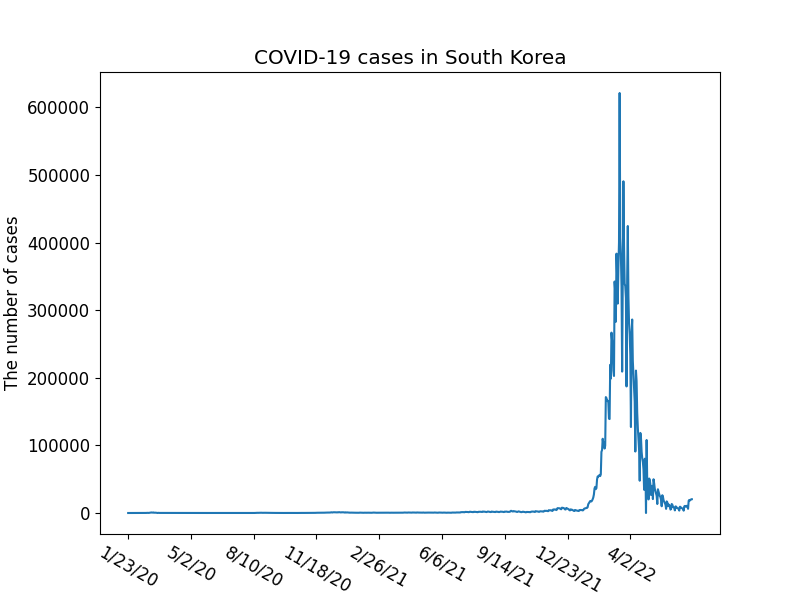

In [57]:
x = df.index
xlab = df['Country/Region']
y = df['Korea, South']
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.plot(x, y)
ax.set_xticks(x[::100], xlab[::100], rotation=-30)
ax.tick_params(axis='both', labelsize='large')
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('The number of cases', fontsize='large')
ax.set_title('COVID-19 cases in South Korea', fontsize='x-large')